# CA 4, Interactive Learning, Fall 2024
- **Name**: Majid Faridfar
- **Student ID**: 810199569

## Part 1: Analytical Questions

### Problem 1

Deep RL algorithms are either based on value learning or direct policy learning. Compare these two categories. In general, why is there a need for direct policy learning as long as value can be learned? Is there a third category that uses both approaches? If so, explain.

#### Value-Based Learning

Value-based learning methods aim to estimate the value function, which represents the expected return (cumulative reward) from a given state or state-action pair. The policy is derived indirectly by selecting actions that maximize the value.

**Example Algorithm**:  
- Deep Q-Networks (DQN) estimate the action-value function $Q(s, a)$ and choose actions greedily:  
  $$ \pi(s) = \arg\max_a Q(s, a) $$

**Advantages**:
- Often more sample-efficient since it uses all experience data to update the value function.
- Works well in environments with discrete action spaces.

**Limitations**:
- Requires careful tuning and stability mechanisms (e.g., experience replay, target networks) to avoid divergence.
- Struggles in large or continuous action spaces due to the need for action maximization over the value function.

---

#### Direct Policy Learning

Policy-based methods directly optimize the policy $\pi(a|s; \theta)$ without relying on a value function. These methods typically use a performance measure (e.g., expected return) and improve the policy parameters using gradient ascent.

**Example Algorithm**:  
- Policy Gradient (PG) methods optimize $J(\theta) = \mathbb{E}[\sum_t r_t]$ using the gradient:  
  $$\nabla_\theta J(\theta) = \mathbb{E}[\nabla_\theta \log \pi(a|s; \theta) R]$$

**Advantages**:
- Handles continuous action spaces more naturally.
- Can represent stochastic policies, which are useful in non-deterministic environments.

**Limitations**:
- High variance in gradient estimates, requiring techniques like baseline subtraction or variance reduction methods.
- Generally less sample-efficient than value-based methods.

---

#### The Necessity for Direct Policy Learning
1. **Complex Policy Structures**: Direct policy learning allows the use of complex parameterized policies (e.g., neural networks representing continuous action distributions), which may be difficult to derive from a value function.

2. **Stochastic Policies**: Some environments require exploration strategies that involve stochastic actions, which are more naturally modeled using direct policy learning.

3. **Optimal Policies Not Easily Derived from Value Functions**: In some cases, computing the optimal action from a value function may be infeasible or suboptimal due to function approximation errors or continuous action spaces.

---

#### Hybrid Approach

**Actor-critic methods** combine both value-based and policy-based learning by maintaining an explicit policy (the actor) and a value function (the critic).

**How It Works**:  
- **Actor** updates the policy directly to maximize returns:  
  $$\pi(a|s; \theta_{\text{actor}})$$
- **Critic** estimates the value function to guide the actor:  
  $$V(s; \theta_{\text{critic}})$$

**Example Algorithms**:
- Advantage Actor-Critic (A2C)
- Deep Deterministic Policy Gradient (DDPG)
- Proximal Policy Optimization (PPO)

**Advantages**:
- Combines the strengths of both approaches: efficient learning from value estimation and flexible policy optimization.
- Actor-critic methods reduce variance in policy gradient estimates using the value function.

### Problem 2

One algorithm that uses the DQN idea is Dueling DQN. Research this algorithm and explain its main differences from DQN. It is important to explain how the advantage function works.

#### Key Differences Between DQN and Dueling DQN

1. **Separate Streams for Value and Advantage Functions**:
   - In DQN, a single neural network estimates the action-value function $Q(s, a; \theta)$, where:
     
     $$Q(s, a) = \mathbb{E}[r + \gamma \max_{a'} Q(s', a')]$$
   - In **Dueling DQN**, the Q-value is decomposed into:
     $$Q(s, a) = V(s; \theta, \beta) + A(s, a; \theta, \alpha)$$
   - Here:
     - $V(s)$: State-value function estimating the expected return from state $s$.
     - $A(s, a)$: Advantage function representing the relative importance of taking action $a$ compared to other actions in state $s$.
   - The network has two separate streams:
     - One stream estimates $V(s)$, capturing the overall value of being in a state.
     - The other stream estimates $A(s, a)$, focusing on the impact of each action in a given state.

2. **Combining Value and Advantage**:  
   To compute the final Q-value, **a reparameterization** is used to ensure the Q-values are not biased:
   $$Q(s, a) = V(s) + \left( A(s, a) - \frac{1}{|\mathcal{A}|} \sum_{a'} A(s, a') \right)$$
   - The subtraction of the mean advantage ensures that the advantage function has a zero mean, avoiding redundancy between the value and advantage terms.

---

#### How the Advantage Function Works

The **advantage function** $A(s, a)$ quantifies how much better taking action $a$ is compared to the average action in state $s$. It is defined as:
$$A(s, a) = Q(s, a) - V(s)$$
- **Interpretation**:  
  - $A(s, a) > 0$: The action $a$ is better than the average action at state \( s \).  
  - $A(s, a) < 0$: The action $a$ is worse than the average action at state \( s \).

By explicitly modeling this distinction, Dueling DQN can better evaluate actions even when only the state value is important (e.g., in states where actions have similar effects).

---

#### Benefits of Dueling DQN
1. **Better State Value Estimation**:  
   Separating value and advantage leads to more efficient learning of state values.
2. **More Robust Action Selection**:  
   It can reduce the overestimation bias typical in standard DQN.
3. **Faster Learning in Redundant Action States**:  
   In states where different actions yield similar rewards, the advantage function allows the model to focus on learning the value of the state rather than distinguishing between equally good actions.

### Problem 3

Examine the A2C algorithm. How is the idea of ​​advantage used in this algorithm? How is this method different from the Dueling DQN method?

**A2C** uses advantage to stabilize and improve the efficiency of **policy-based** learning by incorporating a critic that estimates state value, directly influencing policy updates, while **Dueling DQN** uses advantage to separate state value from action-specific values in a **value-based** framework, improving action evaluation when actions are redundant or unimportant.

These algorithms reflect distinct paradigms of reinforcement learning: A2C belongs to actor-critic policy learning, while Dueling DQN is rooted in value learning.

---

#### Advantage in A2C (Advantage Actor-Critic)

A2C belongs to the family of **policy-based** methods and is an improvement over basic policy gradient algorithms by incorporating value estimation. It uses the **advantage function** to reduce variance in the policy gradient updates.

The advantage function in A2C is defined as:
$$A(s_t, a_t) = R_t - V(s_t)$$
where:
- $A(s_t, a_t)$ is the advantage of taking action $a_t$ in state $s_t$,
- $R_t$ is the cumulative return or a Monte Carlo estimate of the discounted sum of rewards,
- $V(s_t)$ is the value function estimating the expected return from state $s_t$.

A2C updates the policy parameters using:
$$\nabla_\theta J(\theta) = \mathbb{E}\left[\nabla_\theta \log \pi(a_t | s_t; \theta) A(s_t, a_t)\right]$$
By using the advantage function instead of the raw return, A2C provides more stable and efficient policy updates. The value function acts as a baseline to reduce the variance of policy gradients.

---

#### Dueling DQN and Advantage

Dueling DQN is a **value-based** method. It decomposes the Q-value function into:
$$Q(s, a) = V(s) + \left( A(s, a) - \frac{1}{|\mathcal{A}|} \sum_{a'} A(s, a') \right)$$
- **Purpose of Advantage in Dueling DQN**:  
  It separates the **state value** $V(s)$ from the **advantage of each action** $A(s, a)$ to improve action value estimation. The network can more effectively learn which states are valuable, even when actions have similar outcomes, enhancing learning stability in environments with redundant or unimportant actions.

---

#### Key Differences Between A2C and Dueling DQN

| Feature                | **A2C** (Advantage Actor-Critic)                      | **Dueling DQN**                               |
|------------------------|-------------------------------------------------------|------------------------------------------------|
| **Category**            | Policy-based (actor-critic)                           | Value-based                                    |
| **Core Concept**        | Uses a separate policy (actor) and value (critic)     | Decomposes Q-value into value and advantage    |
| **Advantage Definition**| $A(s_t, a_t) = R_t - V(s_t)$                     | $A(s, a) = Q(s, a) - V(s)$                 |
| **Policy Update**       | Directly updates the policy to maximize advantage     | Uses the Q-value for action selection          |
| **Use of Value Function** | Serves as a baseline to reduce variance in policy updates | Improves the estimation of Q-values by separating state value |
| **Applicability**       | Handles both discrete and continuous action spaces    | More suited to discrete action spaces          |

## Part 2: Implementation Environment

### Problem 4

Explore the Cart Pole v1 environment in the Gym library. Provide complete information about the Action Space, Observation Space, and Rewards of this environment.

#### Action space

The action can take values {0, 1} indicating the direction of the fixed force the cart is pushed with.

- 0: Push cart to the left
- 1: Push cart to the right

The velocity that is reduced or increased by the applied force is not fixed and it depends on the angle the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it.

---

#### Observation space
The observation is the values corresponding to the following positions and velocities:

| Num | Observation         | Min                  | Max                  |
|-----|---------------------|----------------------|---------------------|
| 0   | Cart Position       | -4.8                 | 4.8                 |
| 1   | Cart Velocity       | -Inf                 | Inf                 |
| 2   | Pole Angle          | ~ -0.418 rad (-24°)  | ~ 0.418 rad (24°)   |
| 3   | Pole Angular Velocity | -Inf                 | Inf                 |

While the ranges above denote the possible values for observation space of each element, it is not reflective of the allowed values of the state space in an unterminated episode. Particularly:

- The cart x-position (index 0) can be take values between $(-4.8, 4.8)$, but the episode terminates if the cart leaves the $(-2.4, 2.4)$ range.
- The pole angle can be observed between $(-.418, .418)$ radians $(or ±24°)$, but the episode terminates if the pole angle is not in the range $(-.2095, .2095)$ $(or ±12°)$

---

#### Rewards

Since the goal is to keep the pole upright for as long as possible, by default, a reward of $+1$ is given for every step taken, including the termination step. The default reward threshold is 500 for v1 and 200 for v0 due to the time limit on the environment.

If `sutton_barto_reward=True`, then a reward of $0$ is awarded for every non-terminating step and $-1$ for the terminating step. As a result, the reward threshold is 0 for v0 and v1.

### Problem 5

Why is it not good to use classical RL algorithms in this environment?

Classical reinforcement learning (RL) algorithms, such as **Q-Learning** and **SARSA**, are typically not suitable for complex environments like **Gym's CartPole-v1** due to several inherent limitations:

1. **High-Dimensional State Spaces**: In CartPole, the state space is continuous, represented by:
  - Cart position
  - Cart velocity
  - Pole angle
  - Pole angular velocity

  Classical RL algorithms assume **discrete state-action spaces**. For environments with continuous state variables like CartPole, these methods require **discretization of the state space**, which:
  - Leads to a **combinatorial explosion** of possible states.
  - Causes a loss of precision and poor generalization.

  In contrast, deep RL methods like DQN use **neural networks** to approximate the action-value function, allowing them to handle continuous or high-dimensional state spaces more effectively.

2. **Inefficient Use of Memory**: Classical Q-Learning uses a **Q-table** to store the action-value pairs for each state. For high-dimensional problems:
  - The size of the Q-table becomes unmanageable.
  - Memory requirements grow exponentially with the number of state variables and possible actions.

  Deep RL, however, uses **function approximation** to model the Q-values, making it more memory-efficient for environments like CartPole.

3. **Exploration vs. Exploitation Trade-off**: Classical RL algorithms rely on simple exploration strategies like **epsilon-greedy**, which are not robust in environments with sparse or delayed rewards. Deep RL methods incorporate advanced strategies, such as **experience replay and target networks** in DQN, to improve stability and efficiency.

4. **Generalization and Function Approximation**: Classical RL does not generalize well to unseen states. If a new state is encountered, classical algorithms must explore it from scratch. In contrast, deep RL algorithms generalize across states using a neural network trained on past experiences, enabling faster learning and better performance in dynamic environments.

5. **Handling Non-Stationary Policies**: In CartPole, balancing the pole requires continuous adjustment of the cart’s position, creating a dynamic control problem. Classical methods struggle to adapt quickly to such continuous control challenges. Actor-critic methods (like A2C or PPO) are better suited since they learn both a policy and a value function simultaneously.

## Part 3: From Scratch

### Installs and Imports

In [ ]:
%pip install torch

In [ ]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
from collections import deque

### Utils

In [ ]:
def plot_rewards(rewards_all_runs):
    rewards_all_runs = np.array(rewards_all_runs)
    mean_rewards = rewards_all_runs.mean(axis=0)
    std_rewards = rewards_all_runs.std(axis=0)

    episodes = np.arange(len(mean_rewards))
    confidence_interval = stats.norm.interval(0.95, loc=mean_rewards, scale=std_rewards / np.sqrt(len(rewards_all_runs)))

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward")
    plt.fill_between(episodes, confidence_interval[0], confidence_interval[1], alpha=0.3)
    plt.xlabel("Episodes")
    plt.ylabel("Total Reward")
    plt.title("Reward vs. Episodes with 95% Confidence Interval")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def plot_rewards_comp(rewards_all_runs1, rewards_all_runs2):
    rewards_all_runs1 = np.array(rewards_all_runs1)
    rewards_all_runs2 = np.array(rewards_all_runs2)

    mean_rewards1 = rewards_all_runs1.mean(axis=0)
    std_rewards1 = rewards_all_runs1.std(axis=0)
    mean_rewards2 = rewards_all_runs2.mean(axis=0)
    std_rewards2 = rewards_all_runs2.std(axis=0)

    episodes = np.arange(len(mean_rewards1))

    smoothed_rewards1 = moving_average(mean_rewards1)
    smoothed_rewards2 = moving_average(mean_rewards2)

    confidence_interval1 = stats.norm.interval(0.95, loc=mean_rewards1, scale=std_rewards1 / np.sqrt(len(rewards_all_runs1)))
    confidence_interval2 = stats.norm.interval(0.95, loc=mean_rewards2, scale=std_rewards2 / np.sqrt(len(rewards_all_runs2)))

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=episodes[:len(smoothed_rewards1)], y=smoothed_rewards1, label="Smoothed Reward 1")
    sns.lineplot(x=episodes[:len(smoothed_rewards2)], y=smoothed_rewards2, label="Smoothed Reward 2")
    plt.fill_between(episodes[:len(smoothed_rewards1)], confidence_interval1[0][:len(smoothed_rewards1)], confidence_interval1[1][:len(smoothed_rewards1)], alpha=0.3)
    plt.fill_between(episodes[:len(smoothed_rewards2)], confidence_interval2[0][:len(smoothed_rewards2)], confidence_interval2[1][:len(smoothed_rewards2)], alpha=0.3)

    plt.xlabel("Episodes")
    plt.ylabel("Total Reward")
    plt.title("Reward vs. Episodes with 95% Confidence Interval")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
from gym.wrappers import RecordVideo

def test_agent(q_network, env_name='CartPole-v0', video_folder='./video', num_episodes=5):
    env = RecordVideo(gym.make(env_name), video_folder=video_folder)
    env.reset()

    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            # env.render()  # Optional: Render in real-time
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            with torch.no_grad():
                action = q_network(state_tensor).argmax().item()
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            state = next_state
        print(f"Episode {episode + 1}: Total Reward = {total_reward}")

    env.close()
    print(f"Videos saved in '{video_folder}'.")

In [84]:
def run_episodes(q_network, num_episodes):
    env = gym.make('CartPole-v0')

    rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        episode_rewards = []
        done = False
        while not done:
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            with torch.no_grad():
                action = q_network(state_tensor).argmax().item()
            next_state, reward, done, _ = env.step(action)
            episode_rewards.append(reward)
        rewards.append(np.sum(episode_rewards))
    return rewards

### Problem 6

Implement DQN from scratch without using any libraries.



#### Hyperparameters

In [ ]:
GAMMA = 0.99
LEARNING_RATE = 1e-3
BATCH_SIZE = 64
TARGET_UPDATE_FREQ = 1000
MEMORY_SIZE = 10000
EPSILON_START = 1.0
EPSILON_END = 0.01
EPSILON_DECAY = 500
NUM_RUNS = 3
NUM_EPISODES = 1000
MAX_T = 500

#### Implementation

In [ ]:
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

In [ ]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        samples = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*samples)
        return (np.array(states), np.array(actions), np.array(rewards),
                np.array(next_states), np.array(dones))

    def __len__(self):
        return len(self.buffer)

In [ ]:
def epsilon_greedy_policy(state, epsilon, q_network, action_dim):
    if random.random() < epsilon:
        return random.randint(0, action_dim - 1)
    else:
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_values = q_network(state_tensor)
        return q_values.argmax().item()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def train(num_runs=3, num_episodes=500, max_t=500):
    env = gym.make('CartPole-v0')
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    rewards_all_runs = []

    for run in range(num_runs):
        q_network = DQN(state_dim, action_dim)
        target_network = DQN(state_dim, action_dim)
        target_network.load_state_dict(q_network.state_dict())
        target_network.eval()

        optimizer = optim.Adam(q_network.parameters(), lr=LEARNING_RATE)
        memory = ReplayBuffer(MEMORY_SIZE)

        epsilon = EPSILON_START
        step_count = 0
        rewards_per_episode = []

        for episode in range(num_episodes):
            state = env.reset()
            total_reward = 0

            for t in range(max_t):
                action = epsilon_greedy_policy(state, epsilon, q_network, action_dim)
                next_state, reward, done, _ = env.step(action)
                memory.push(state, action, reward, next_state, done)
                state = next_state
                total_reward += reward

                if len(memory) >= BATCH_SIZE:
                    states, actions, rewards, next_states, dones = memory.sample(BATCH_SIZE)
                    states = torch.FloatTensor(states)
                    actions = torch.LongTensor(actions).unsqueeze(1)
                    rewards = torch.FloatTensor(rewards)
                    next_states = torch.FloatTensor(next_states)
                    dones = torch.FloatTensor(dones)

                    q_values = q_network(states).gather(1, actions).squeeze()
                    next_q_values = target_network(next_states).max(1)[0]
                    target_q_values = rewards + GAMMA * next_q_values * (1 - dones)

                    loss = nn.MSELoss()(q_values, target_q_values.detach())
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                if step_count % TARGET_UPDATE_FREQ == 0:
                    target_network.load_state_dict(q_network.state_dict())

                step_count += 1
                if done:
                    break

            epsilon = max(EPSILON_END, EPSILON_START - episode / EPSILON_DECAY)
            rewards_per_episode.append(total_reward)

        rewards_all_runs.append(rewards_per_episode)

    env.close()

    return q_network, rewards_all_runs

#### Run

Train the agent in Cart-Pole environment.

In [ ]:
q_network, rewards_all_runs = train(num_runs=NUM_RUNS, num_episodes=NUM_EPISODES, max_t=MAX_T)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated,

After the agent has learned, plot the reward earned by the agent over several different runs. The plot should include a 95% confidence interval.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


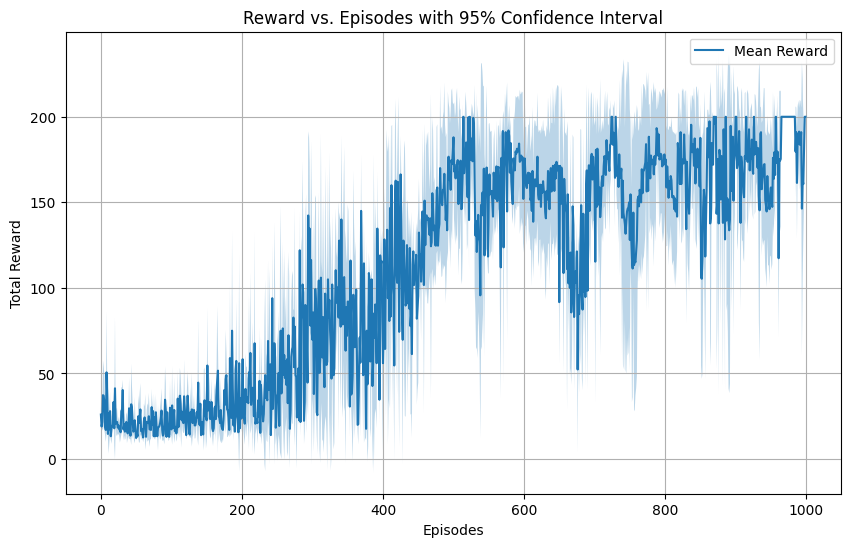

In [ ]:
plot_rewards(rewards_all_runs)

Make a video of several episodes of testing the agent after learning.

In [ ]:
test_agent(q_network)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `Record

Episode 1: Total Reward = 166.0


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode 2: Total Reward = 163.0
Episode 3: Total Reward = 170.0
Episode 4: Total Reward = 167.0
Episode 5: Total Reward = 172.0
Videos saved in './video'.


### Problem 7

Implement Dueling DQN from scratch without using any libraries.

#### Hyperparameters

In [ ]:
GAMMA = 0.99
LEARNING_RATE = 1e-3
BATCH_SIZE = 64
TARGET_UPDATE_FREQ = 1000
MEMORY_SIZE = 10000
EPSILON_START = 1.0
EPSILON_END = 0.01
EPSILON_DECAY = 500
NUM_RUNS = 3
NUM_EPISODES = 1000
MAX_T = 500

#### Implementation

In [ ]:
class DuelingDQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DuelingDQN, self).__init__()
        self.feature_layer = nn.Sequential(
            nn.Linear(state_dim, 128),
            nn.ReLU()
        )
        self.value_stream = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
        self.advantage_stream = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, action_dim)
        )

    def forward(self, x):
        features = self.feature_layer(x)
        values = self.value_stream(features)
        advantages = self.advantage_stream(features)
        return values + (advantages - advantages.mean(dim=1, keepdim=True))

In [ ]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        samples = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*samples)
        return (np.array(states), np.array(actions), np.array(rewards),
                np.array(next_states), np.array(dones))

    def __len__(self):
        return len(self.buffer)

In [ ]:
def epsilon_greedy_policy(state, epsilon, q_network, action_dim):
    if random.random() < epsilon:
        return random.randint(0, action_dim - 1)
    else:
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_values = q_network(state_tensor)
        return q_values.argmax().item()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def train_DDQN(num_runs=3, num_episodes=500, max_t=500):
    env = gym.make('CartPole-v0')
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    rewards_all_runs = []

    for run in range(num_runs):
        q_network = DuelingDQN(state_dim, action_dim)
        target_network = DuelingDQN(state_dim, action_dim)
        target_network.load_state_dict(q_network.state_dict())
        target_network.eval()

        optimizer = optim.Adam(q_network.parameters(), lr=LEARNING_RATE)
        memory = ReplayBuffer(MEMORY_SIZE)

        epsilon = EPSILON_START
        step_count = 0
        rewards_per_episode = []

        for episode in range(num_episodes):
            state = env.reset()
            total_reward = 0

            for t in range(max_t):
                action = epsilon_greedy_policy(state, epsilon, q_network, action_dim)
                next_state, reward, done, _ = env.step(action)
                memory.push(state, action, reward, next_state, done)
                state = next_state
                total_reward += reward

                if len(memory) >= BATCH_SIZE:
                    states, actions, rewards, next_states, dones = memory.sample(BATCH_SIZE)
                    states = torch.FloatTensor(states)
                    actions = torch.LongTensor(actions).unsqueeze(1)
                    rewards = torch.FloatTensor(rewards)
                    next_states = torch.FloatTensor(next_states)
                    dones = torch.FloatTensor(dones)

                    q_values = q_network(states).gather(1, actions).squeeze()
                    next_q_values = target_network(next_states).max(1)[0]
                    target_q_values = rewards + GAMMA * next_q_values * (1 - dones)

                    loss = nn.MSELoss()(q_values, target_q_values.detach())
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                if step_count % TARGET_UPDATE_FREQ == 0:
                    target_network.load_state_dict(q_network.state_dict())

                step_count += 1
                if done:
                    break

            epsilon = max(EPSILON_END, EPSILON_START - episode / EPSILON_DECAY)
            rewards_per_episode.append(total_reward)

        rewards_all_runs.append(rewards_per_episode)

    env.close()

    return q_network, rewards_all_runs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Run

Train the agent in Cart-Pole environment.

In [ ]:
q_network_ddqn, rewards_all_runs_ddqn = train_DDQN(num_runs=NUM_RUNS, num_episodes=NUM_EPISODES, max_t=MAX_T)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated,

After the agent has learned, plot the reward earned by the agent over several different runs. The plot should include a 95% confidence interval.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


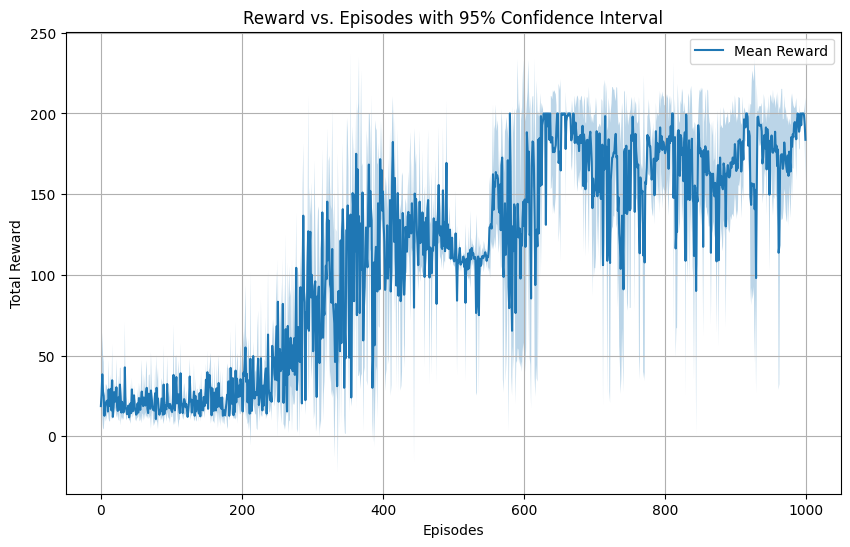

In [ ]:
plot_rewards(rewards_all_runs_ddqn)

Make a video of several episodes of testing the agent after learning.

In [ ]:
test_agent(q_network_ddqn)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `Record

Episode 1: Total Reward = 191.0


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode 2: Total Reward = 179.0
Episode 3: Total Reward = 188.0
Episode 4: Total Reward = 186.0
Episode 5: Total Reward = 173.0
Videos saved in './video'.


### Problem 8

Do you see a difference in the convergence of the two algorithms? Which one learned the environment better and faster? Why? Analyze the results.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


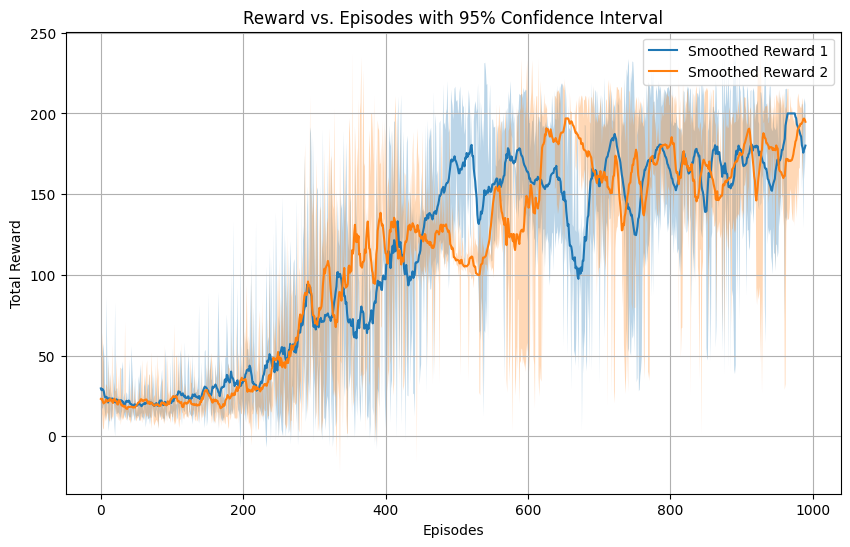

In [ ]:
plot_rewards_comp(rewards_all_runs, rewards_all_runs_ddqn)

#### Key Observations
1. **Learning Speed (Convergence):**
   - **DQN (blue)** shows a slightly faster rise in total reward initially, indicating it learns the environment slightly faster in the early stages.
   - **Dueling DQN (orange)** takes a bit more time to reach higher reward levels, suggesting slower initial learning.

2. **Stability and Variability:**
   - **DQN** exhibits **more variability and instability** throughout the training process, with larger fluctuations even after many episodes.
   - **Dueling DQN**, although initially slower, shows **more stability** with smaller fluctuations in reward towards the later episodes.

3. **Overall Performance (Max Reward):**
   - Both algorithms seem to reach similar maximum rewards near the end of the training, but **Dueling DQN** provides a **smoother curve**, implying better consistency in its policy compared to **DQN**.

3. **Generated Videos:**
  - In the generated videos, it can be clearly seen that the agent which has learnt the environment with Dueling DQN is more stable than DQN.

---

#### Analysis and Explanation
##### Why Dueling DQN Learns More Stably
- **Dueling DQN** separates the estimation of the **state value function (V)** and the **advantage function (A)**, which allows the model to better differentiate between the importance of states and actions. This architecture helps it:
  - Reduce noise by focusing on important states rather than noisy actions.
  - Provide more stable updates, leading to smoother convergence.
  
- **DQN**, in contrast, uses a simpler Q-network that directly maps states to action values, making it more susceptible to overestimation errors and higher variance during training.

##### Why DQN Learns Faster Initially
- **DQN**'s simpler architecture might have led to faster initial learning since it directly updates Q-values without computing separate advantage estimates. This reduces computation and learning complexity at the start, though at the cost of long-term stability.

---

#### Conclusion
- **Dueling DQN** is generally better for environments where distinguishing between good and bad states is critical, even if all actions have similar consequences. In the CartPole scenario, it leads to **smoother and more stable learning**.
- **DQN** learns faster initially but is less stable, which may result in higher variance in rewards.

For tasks where stability and consistency are essential (such as longer or more complex environments), **Dueling DQN** is preferable despite its slower initial convergence.

## Part 4: Using Library

### Problem 9

Check out the A2C algorithm from the Stable Baseline 3 library and run it on the cart pole environment. Your A2C agent should learn the cart pole environment.

#### Installs and Imports

In [ ]:
!pip install box2d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 36.2 MB/s eta 0:00:00


In [ ]:
!pip install stable-baselines3

  Using cached stable_baselines3-2.4.1-py3-none-any.whl.metadata (4.5 kB)
  Using cached gymnasium-1.0.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
Using cached stable_baselines3-2.4.1-py3-none-any.whl (183 kB)
Using cached gymnasium-1.0.0-py3-none-any.whl (958 kB)
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)


In [ ]:
!pip install 'shimmy>=2.0

/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [90]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
from scipy import stats

#### Run

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 48.2     |
|    ep_rew_mean        | 48.2     |
| time/                 |          |
|    fps                | 541      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.66    |
|    explained_variance | -0.0159  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.55     |
|    value_loss         | 8.75     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 56.7     |
|    ep_rew_mean        | 56.7     |
| time/                 |          |
|    fps                | 540      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/             

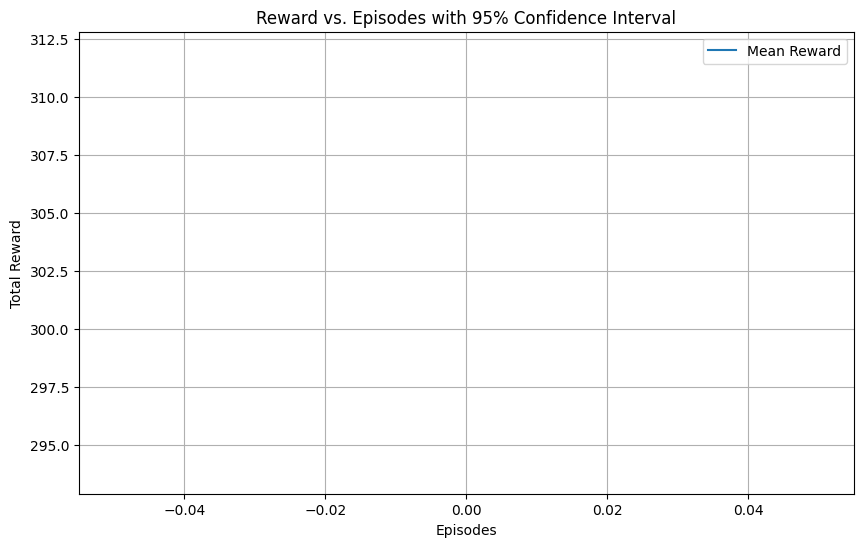

In [91]:
env_id = "CartPole-v1"
env = make_vec_env(env_id, n_envs=1)

model = A2C("MlpPolicy", env, verbose=1)

# Parameters
train_interval = 5
reward_tracking = []

# Track rewards during learning
for episode in range(NUM_EPISODES):
    obs = env.reset()
    total_reward = 0
    done = False
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action)
        total_reward += reward
    reward_tracking.append(total_reward)

    # Update the model every `train_interval` episodes
    if (episode + 1) % train_interval == 0:
        model.learn(total_timesteps=500, reset_num_timesteps=False)

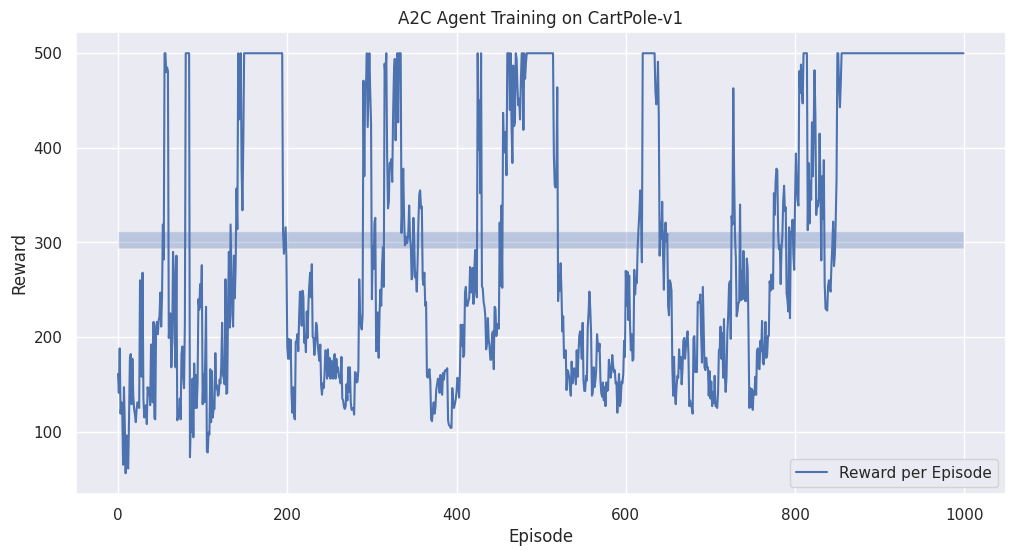

In [96]:
# Convert rewards to an array for statistics
reward_array = np.array(reward_tracking)
mean_rewards = np.mean(reward_array)
std_rewards = np.std(reward_array)
conf_interval = 1.96 * std_rewards / np.sqrt(len(reward_tracking))

# Plotting
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(reward_tracking, label="Reward per Episode")
plt.fill_between(range(len(reward_tracking)),
                 mean_rewards - conf_interval,
                 mean_rewards + conf_interval, alpha=0.3)
plt.title("A2C Agent Training on CartPole-v1")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.show()

### Problem 10

Compare the results of A2C and DQN. Which algorithm is better? Why?

#### Performance Comparison

1. **A2C:**
   - **Higher Total Rewards:** The A2C algorithm consistently achieves higher total rewards compared to DQN. The smoothed reward for A2C fluctuates around 500, indicating that the agent successfully learns to balance the pole and maintains good performance throughout the episodes.
   - **Stability:** The shaded area, representing the 95% confidence interval, shows that A2C has relatively stable performance with less variance. This stability is crucial for reliable and robust performance in reinforcement learning tasks.

2. **DQN:**
   - **Lower Total Rewards:** The DQN algorithm's smoothed reward remains close to 0, indicating that the agent struggles to learn the optimal policy for balancing the pole. This suggests that DQN is not performing well in this particular environment.
   - **Higher Variability:** The DQN's confidence interval shows higher variability, indicating less stable performance.

---

#### Why A2C Performs Better in Cart Pole

- **Policy-Based Method:** A2C directly optimizes the policy, allowing it to efficiently learn the action probabilities that maximize rewards. This can be advantageous in environments where continuous control is essential.
- **Actor-Critic Architecture:** The combination of actor and critic helps stabilize learning by providing more accurate value estimates and reducing variance in policy updates.
- **Sample Efficiency:** While A2C might be less sample efficient than DQN, its parallel environments can speed up learning and provide more robust policy updates.

---

#### Conclusion

In the Cart Pole environment, **A2C** performs significantly better than **DQN**. The higher total rewards, stability, and effective learning process make A2C the superior algorithm for this specific task. The direct policy optimization and actor-critic architecture of A2C contribute to its success in achieving and maintaining the balance of the pole.